## ENPH 353 Lecture 2 - An introduction to modeling and non-linear curve fitting

Version 1.1 August 21 2018, Rob Knobel

## Name: Keegan Kelly

This python notebook contains skeleton code of how to do a non-linear curve fit using standard python packages (matplotlib, scipy.optimize).  You can re-use this code later in the term if it is helpful.  At the end of the class period, you will upload a pdf printout of this workbook for grading.  Details are below.

The first few cells load in the required packages for python.  To evaluate each cell, select it with your mouse then click **shift-enter**.

In [1]:
# Brings in the numpy package, giving numerical functions to python.  All calls to functions in the package are prefaced by np.
import numpy as np

In [2]:
# Brings in the matplotlib graphics package.  All calls to it prefaced by plt.
import matplotlib as plt
 #  This makes the plots from matplotlib appear in the notebook.
%matplotlib inline

In [3]:
# More importing of the curve_fit package and pylab has plotting tools.
from scipy.optimize import curve_fit
from pylab import *

Next, load the data from the text file.  The data is stored as time (in milliseconds), signal (in volts) and uncertainty in the signal (in volts).

In [4]:
data = np.genfromtxt('curve fit exercise.csv',delimiter=',', skip_header=1)

In [5]:
print(data)

[[ 0.2 41.1  0.9]
 [ 1.4 37.2  0.9]
 [ 2.7 28.3  0.9]
 [ 3.9 24.8  1.1]
 [ 5.1 27.8  0.8]
 [ 6.4 34.5  0.7]
 [ 7.6 39.   0.9]
 [ 8.8 37.7  0.8]
 [10.1 29.8  0.9]
 [11.3 22.2  0.7]
 [12.5 22.3  0.6]
 [13.8 26.7  1.1]
 [15.  30.4  0.7]
 [16.2 32.6  0.8]
 [17.5 28.9  0.8]
 [18.7 22.9  1.3]
 [19.9 21.7  0.9]
 [21.1 22.1  1. ]
 [22.4 22.3  1. ]
 [23.6 26.3  1. ]
 [24.8 26.2  0.8]
 [26.1 21.4  0.9]
 [27.3 20.   1. ]
 [28.5 20.1  1.2]
 [29.8 21.2  0.5]
 [31.  22.   0.9]
 [32.2 21.6  0.7]
 [33.5 21.   0.7]
 [34.7 19.7  0.9]
 [35.9 17.9  0.9]
 [37.2 18.1  0.8]
 [38.4 18.9  1.1]]


In [6]:
# Break up the multi-dimensional data into three vectors for time, signal and uncertainty.
time = data[:,0]
signal = data[:,1]
uncertainty = data[:,2]

We can plot using the matplotlib package for python.  Using the tips available at, for instance, https://matplotlib.org/examples/showcase/anatomy.html

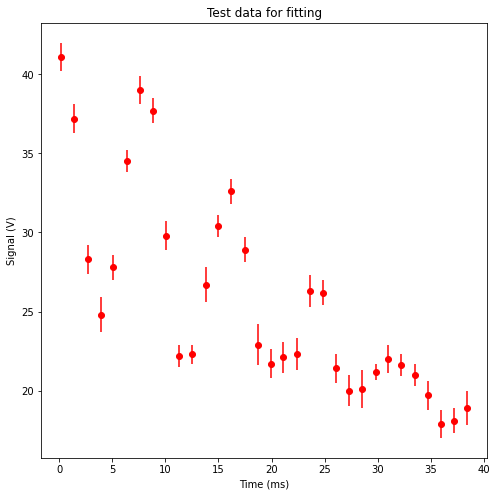

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))   #  A sigle plot 8cm square
ax.set_title('Test data for fitting')    #  Plot title
ax.set_ylabel('Signal (V)')              #  y-axis label
ax.set_xlabel('Time (ms)')               #  x-axis label 
ax.errorbar(time,signal,uncertainty,fmt='o',color='r')   # errorbar plot with circle symbols in red
plt.show()                               #  Show the plot below

The data will be fit to the function

$d(t) = A(1+B \cos \omega t) e^{-t^2/2\tau^2} +C$

where the fitting parameters are $A$, $B$, $C$, $\omega$ and $\tau$.  The next cell defines the fitting function.

In [8]:
# define the fitting function
def fit_func(t,a,b,c,omega,tau):
    return a*(1+b*np.cos(omega*t))*np.exp(-t**2.0/(2.0*tau**2.0))+c
# count the number of times we run the fit
iteration = 1

## Exercise:
Estimate starting parameters for the fit (given in the **start** array below) that give a good fit. Rather than replacing the numbers, please copy the next cell over each time you change the fit.  

It is best to understand how the fitting function behaves, and have initial guesses that are somewhat close to the correct values.  Feel free to use cells in the notebook to compute this.

How can you tell if the fit is "good"?  How good is it?

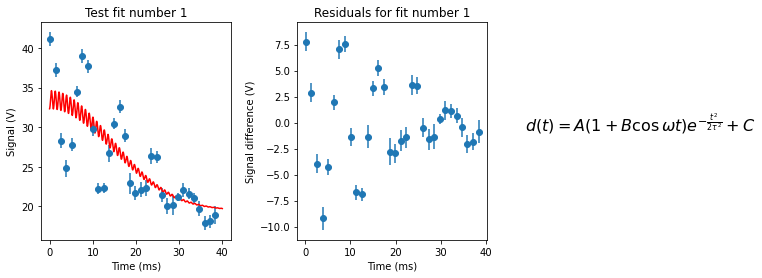

Start A =	 1.0 		, Final A =	 14.038050312983598  +/-  0.46965826017807527
Start B =	 1.0 		, Final B =	 -0.0817401762771675  +/-  0.027174960063233566
Start C =	 1.0 		, Final C =	 19.433130978962694  +/-  0.4691730235231126
Start omega =	 1.0 		, Final omega =	 -7.186650369870103  +/-  0.031966738417102805
Start tau =	 1.0 		, Final tau =	 14.220330105084917  +/-  0.7539260384124485

 chisq = 747.0598330711771 	 df = 27 		 reduced chisq =  27.668882706339893


In [9]:
# Starting parameter values:  A, B, C, omega, tau
#  THIS IS WHAT WE'LL CHANGE TO START THE FIT AT A DIFFERENT POINT
start = np.array([1.0, 1.0, 1.0, 1.0, 1.0])


# Perform the fit
popt,pcov=curve_fit(fit_func,time,signal,p0=start,sigma=uncertainty,absolute_sigma=True)

#Plot the data and fit
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))

ax1.errorbar(time,signal,uncertainty,fmt='o')
x = np.linspace(0,40,1000)
ax1.plot(x,fit_func(x,popt[0],popt[1],popt[2],popt[3],popt[4]),'r')
title = 'Test fit number ' + str(iteration)
ax1.set_title(title)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Signal (V)')

# Plot the residuals

ax2.errorbar(time,signal-fit_func(time,popt[0],popt[1],popt[2],popt[3],popt[4]),uncertainty,fmt='o')
title = 'Residuals for fit number ' + str(iteration)
ax2.set_title(title)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Signal difference (V)')
plt.subplots_adjust(wspace=0.35)

# Show the equation
text = r'$d(t) = A(1 + B \cos \omega t) e^{-\frac{t^2}{2 \tau^2}} + C$'
ax = plt.gca()
ax.text(1.2,0.5,text,transform=ax.transAxes,fontsize=16)

plt.show()
iteration = iteration + 1

# Print out the coefficients and the 1-sigma uncertainty on the coefficients.  The uncertainty on each coefficient is
#    given by the square root of the diagonal of the covariance matrix pcov.

coefficient_err = np.sqrt(np.diag(pcov))
coefficients = popt
print("Start A =\t", start[0],"\t\t, Final A =\t",coefficients[0]," +/- ",coefficient_err[0])
print("Start B =\t", start[1],"\t\t, Final B =\t",coefficients[1]," +/- ",coefficient_err[1])
print("Start C =\t", start[2],"\t\t, Final C =\t",coefficients[2]," +/- ",coefficient_err[2])
print("Start omega =\t",start[3],"\t\t, Final omega =\t",coefficients[3]," +/- ",coefficient_err[3])
print("Start tau =\t",start[4], "\t\t, Final tau =\t",coefficients[4]," +/- ",coefficient_err[4])

# Calculate the Chi-squared goodness of fit statistic, and the reduced chi squared statistic.
fitted = fit_func(time, *popt)
residuals = signal - fitted
chisq = np.sum((residuals/uncertainty)**2)
degree_freedom = len(time) - len(popt)
print("\n chisq =",chisq,"\t df =",degree_freedom,"\t\t reduced chisq = ",chisq/degree_freedom)

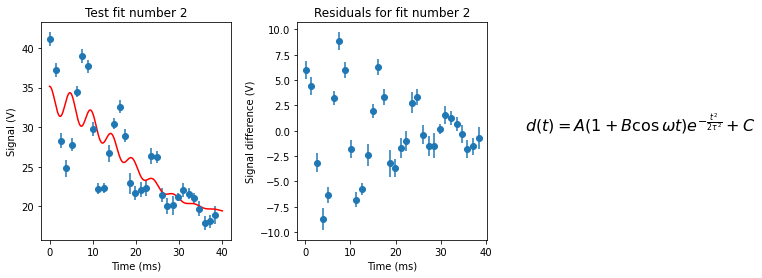

Start A =	 5.0 		, Final A =	 14.303436537775157  +/-  0.5112226195905366
Start B =	 10.0 		, Final B =	 0.12688395833078286  +/-  0.024986086173956795
Start C =	 20.0 		, Final C =	 19.037995820598937  +/-  0.5329236672550014
Start omega =	 1.4 		, Final omega =	 1.3035523898586903  +/-  0.018808173398932853
Start tau =	 14.0 		, Final tau =	 14.884949388589229  +/-  0.8152965432357242

 chisq = 730.0578339644289 	 df = 27 		 reduced chisq =  27.03917903571959


In [10]:
# Starting parameter values:  A, B, C, omega, tau
#  THIS IS WHAT WE'LL CHANGE TO START THE FIT AT A DIFFERENT POINT
start = np.array([5, 10, 20, 1.4, 14])


# Perform the fit
popt,pcov=curve_fit(fit_func,time,signal,p0=start,sigma=uncertainty,absolute_sigma=True)

#Plot the data and fit
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))

ax1.errorbar(time,signal,uncertainty,fmt='o')
x = np.linspace(0,40,1000)
ax1.plot(x,fit_func(x,popt[0],popt[1],popt[2],popt[3],popt[4]),'r')
title = 'Test fit number ' + str(iteration)
ax1.set_title(title)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Signal (V)')

# Plot the residuals

ax2.errorbar(time,signal-fit_func(time,popt[0],popt[1],popt[2],popt[3],popt[4]),uncertainty,fmt='o')
title = 'Residuals for fit number ' + str(iteration)
ax2.set_title(title)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Signal difference (V)')
plt.subplots_adjust(wspace=0.35)

# Show the equation
text = r'$d(t) = A(1 + B \cos \omega t) e^{-\frac{t^2}{2 \tau^2}} + C$'
ax = plt.gca()
ax.text(1.2,0.5,text,transform=ax.transAxes,fontsize=16)

plt.show()
iteration = iteration + 1

# Print out the coefficients and the 1-sigma uncertainty on the coefficients.  The uncertainty on each coefficient is
#    given by the square root of the diagonal of the covariance matrix pcov.

coefficient_err = np.sqrt(np.diag(pcov))
coefficients = popt
print("Start A =\t", start[0],"\t\t, Final A =\t",coefficients[0]," +/- ",coefficient_err[0])
print("Start B =\t", start[1],"\t\t, Final B =\t",coefficients[1]," +/- ",coefficient_err[1])
print("Start C =\t", start[2],"\t\t, Final C =\t",coefficients[2]," +/- ",coefficient_err[2])
print("Start omega =\t",start[3],"\t\t, Final omega =\t",coefficients[3]," +/- ",coefficient_err[3])
print("Start tau =\t",start[4], "\t\t, Final tau =\t",coefficients[4]," +/- ",coefficient_err[4])

# Calculate the Chi-squared goodness of fit statistic, and the reduced chi squared statistic.
fitted = fit_func(time, *popt)
residuals = signal - fitted
chisq = np.sum((residuals/uncertainty)**2)
degree_freedom = len(time) - len(popt)
print("\n chisq =",chisq,"\t df =",degree_freedom,"\t\t reduced chisq = ",chisq/degree_freedom)

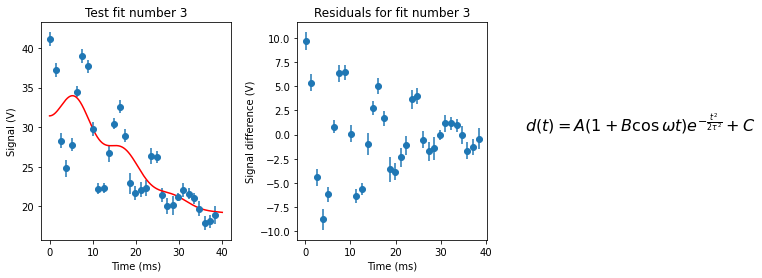

Start A =	 5.0 		, Final A =	 14.537292029605695  +/-  0.5486576867022758
Start B =	 10.0 		, Final B =	 -0.12441040209194779  +/-  0.023469181091423683
Start C =	 20.0 		, Final C =	 18.696919792343536  +/-  0.5853216800215166
Start omega =	 0.5 		, Final omega =	 0.5183641702849416  +/-  0.01873548116435389
Start tau =	 14.0 		, Final tau =	 15.421277553702772  +/-  0.8644768225730053

 chisq = 728.193859122262 	 df = 27 		 reduced chisq =  26.97014293045415


In [11]:
# Starting parameter values:  A, B, C, omega, tau
#  THIS IS WHAT WE'LL CHANGE TO START THE FIT AT A DIFFERENT POINT
start = np.array([5, 10, 20, 0.5, 14])


# Perform the fit
popt,pcov=curve_fit(fit_func,time,signal,p0=start,sigma=uncertainty,absolute_sigma=True)

#Plot the data and fit
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))

ax1.errorbar(time,signal,uncertainty,fmt='o')
x = np.linspace(0,40,1000)
ax1.plot(x,fit_func(x,popt[0],popt[1],popt[2],popt[3],popt[4]),'r')
title = 'Test fit number ' + str(iteration)
ax1.set_title(title)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Signal (V)')

# Plot the residuals

ax2.errorbar(time,signal-fit_func(time,popt[0],popt[1],popt[2],popt[3],popt[4]),uncertainty,fmt='o')
title = 'Residuals for fit number ' + str(iteration)
ax2.set_title(title)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Signal difference (V)')
plt.subplots_adjust(wspace=0.35)

# Show the equation
text = r'$d(t) = A(1 + B \cos \omega t) e^{-\frac{t^2}{2 \tau^2}} + C$'
ax = plt.gca()
ax.text(1.2,0.5,text,transform=ax.transAxes,fontsize=16)

plt.show()
iteration = iteration + 1

# Print out the coefficients and the 1-sigma uncertainty on the coefficients.  The uncertainty on each coefficient is
#    given by the square root of the diagonal of the covariance matrix pcov.

coefficient_err = np.sqrt(np.diag(pcov))
coefficients = popt
print("Start A =\t", start[0],"\t\t, Final A =\t",coefficients[0]," +/- ",coefficient_err[0])
print("Start B =\t", start[1],"\t\t, Final B =\t",coefficients[1]," +/- ",coefficient_err[1])
print("Start C =\t", start[2],"\t\t, Final C =\t",coefficients[2]," +/- ",coefficient_err[2])
print("Start omega =\t",start[3],"\t\t, Final omega =\t",coefficients[3]," +/- ",coefficient_err[3])
print("Start tau =\t",start[4], "\t\t, Final tau =\t",coefficients[4]," +/- ",coefficient_err[4])

# Calculate the Chi-squared goodness of fit statistic, and the reduced chi squared statistic.
fitted = fit_func(time, *popt)
residuals = signal - fitted
chisq = np.sum((residuals/uncertainty)**2)
degree_freedom = len(time) - len(popt)
print("\n chisq =",chisq,"\t df =",degree_freedom,"\t\t reduced chisq = ",chisq/degree_freedom)

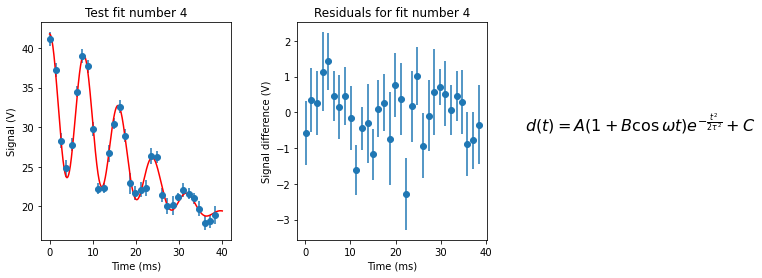

Start A =	 15.0 		, Final A =	 14.477117193211614  +/-  0.5341865368497322
Start B =	 1.0 		, Final B =	 0.6220961631431454  +/-  0.03882942095952217
Start C =	 18.0 		, Final C =	 18.307102110174785  +/-  0.4954630135105552
Start omega =	 0.6283185307179586 		, Final omega =	 0.780993271157039  +/-  0.003463775006847885
Start tau =	 14.0 		, Final tau =	 16.169012376050745  +/-  0.6501235543885086

 chisq = 29.014648365670737 	 df = 27 		 reduced chisq =  1.0746166061359532


In [12]:
# Starting parameter values:  A, B, C, omega, tau
#  THIS IS WHAT WE'LL CHANGE TO START THE FIT AT A DIFFERENT POINT
start = np.array([15, 1, 18, 2*np.pi/10, 14])


# Perform the fit
popt,pcov=curve_fit(fit_func,time,signal,p0=start,sigma=uncertainty,absolute_sigma=True)

#Plot the data and fit
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))

ax1.errorbar(time,signal,uncertainty,fmt='o')
x = np.linspace(0,40,1000)
ax1.plot(x,fit_func(x,popt[0],popt[1],popt[2],popt[3],popt[4]),'r')
title = 'Test fit number ' + str(iteration)
ax1.set_title(title)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Signal (V)')

# Plot the residuals

ax2.errorbar(time,signal-fit_func(time,popt[0],popt[1],popt[2],popt[3],popt[4]),uncertainty,fmt='o')
title = 'Residuals for fit number ' + str(iteration)
ax2.set_title(title)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Signal difference (V)')
plt.subplots_adjust(wspace=0.35)

# Show the equation
text = r'$d(t) = A(1 + B \cos \omega t) e^{-\frac{t^2}{2 \tau^2}} + C$'
ax = plt.gca()
ax.text(1.2,0.5,text,transform=ax.transAxes,fontsize=16)

plt.show()
iteration = iteration + 1

# Print out the coefficients and the 1-sigma uncertainty on the coefficients.  The uncertainty on each coefficient is
#    given by the square root of the diagonal of the covariance matrix pcov.

coefficient_err = np.sqrt(np.diag(pcov))
coefficients = popt
print("Start A =\t", start[0],"\t\t, Final A =\t",coefficients[0]," +/- ",coefficient_err[0])
print("Start B =\t", start[1],"\t\t, Final B =\t",coefficients[1]," +/- ",coefficient_err[1])
print("Start C =\t", start[2],"\t\t, Final C =\t",coefficients[2]," +/- ",coefficient_err[2])
print("Start omega =\t",start[3],"\t\t, Final omega =\t",coefficients[3]," +/- ",coefficient_err[3])
print("Start tau =\t",start[4], "\t\t, Final tau =\t",coefficients[4]," +/- ",coefficient_err[4])

# Calculate the Chi-squared goodness of fit statistic, and the reduced chi squared statistic.
fitted = fit_func(time, *popt)
residuals = signal - fitted
chisq = np.sum((residuals/uncertainty)**2)
degree_freedom = len(time) - len(popt)
print("\n chisq =",chisq,"\t df =",degree_freedom,"\t\t reduced chisq = ",chisq/degree_freedom)

You can tell that the curve fit is good if the reduced chi square is about 1. This fit is 1.07 which means that the fit is very good.

### Answer the following questions and do the following exercises (if time permits):
* What is the smallest value of $\chi^2$ you obtained?
* Are the quoted uncertainties in the parameters smallest for this fit?  If the uncertainties aren't the smallest for this fit, what does that mean?
* In a later cell there is a function which looks at the quality of the fit while changing one parameter. We fix all the parameters to the best fit values **except** $\omega$ and do a loop with $\omega$ varying from .05 to 3.95.  Plot $\chi^2$ as a function of $\omega$.  Describe the fit.  Where is the best fit value?  Describe what is happening in the minimum around 1.4.

The smallest reduced chi squared obtained was 1.07. The quoted uncertainties are the smallest for this fit. The fit of the curve is highly dependant on the value of omega. The best fit value is at omega = 0.78. Around 1.4 there is a local minimum where the fit improves around this value, but is still very poor relative to the best fit value. If you started your fit at around this value, the optimizer would likely get stuck in this local minimum.

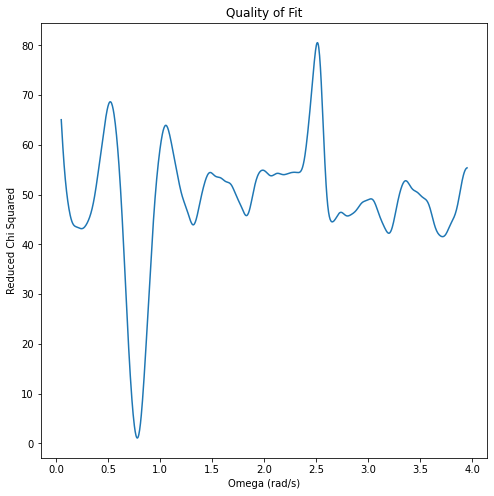

Minimum reduced chi squared = 1.0776222387285748 	 at omega = 0.7800300300300301


In [13]:
# Take the previously fit parameters but vary the frequency omega.
best = popt
omega_range = np.linspace(.05, 3.95, num=1000)

# Loop over the omega_range values
chi_range = []


for om in omega_range:
    popt[3]=om
    fitted = fit_func(time, *popt)
    residuals = signal - fitted               # Calculate the residuals for best fit with varying omega
    chisq = np.sum((residuals/uncertainty)**2)  # Calculate Chi squared for that fit
    degree_freedom = len(time) - len(popt)
#    print("Omega =", om,"\t chisq =",chisq,"\t df =",degree_freedom,"\t\t reduced chisq = ",chisq/degree_freedom)
    chi_range=np.append(chi_range, chisq/degree_freedom)    # Build an array of the reduced Chi squared for each omega

#Plot the reduced chi squared vs. omega    
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Quality of Fit')
ax.set_ylabel('Reduced Chi Squared')
ax.set_xlabel('Omega (rad/s)')
ax.plot(omega_range,chi_range)
plt.show()
#print min chi squared and corresponding omega
print("Minimum reduced chi squared =",np.min(chi_range),"\t at omega =",omega_range[np.argmin(chi_range)])